In [124]:
import sys 
import sys 
from keyvars import ufiles_path
sys.path.append(ufiles_path)

import uvars
import uviz
import uerrortab as uterror
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
paths = uvars.parqts
df = pd.read_parquet(paths[0])

demcols = ['cop', 'edem', 'pband','tdemx']
ftcols = ['cop', 'edem', 'pband', 's1', 'tdemx', 'wc', 'wc_ffth',
       'wc_gau', 'wc_sobelm', 'wc_sobelh', 'wc_sobelv']

fcolx = ['tdemx','edem', 'wc_ffth','wc_gau', 'wc_sobelm', 'wc_sobelh', 'wc_sobelv']
tcolx = 'pband'

ftcols_c = ['cop', 'edem', 'pband', 's1', 'tdemx', 'wc_ffth','wc_gau']


COLS = demcols

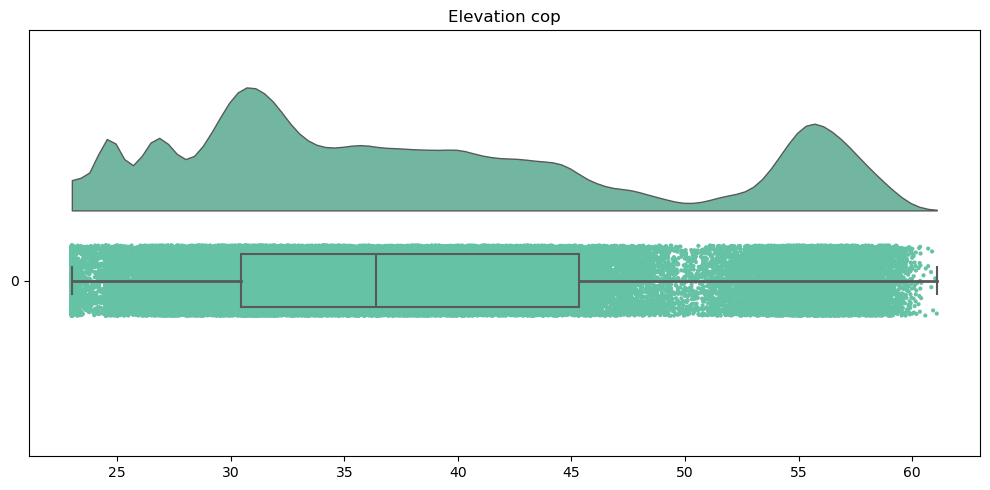

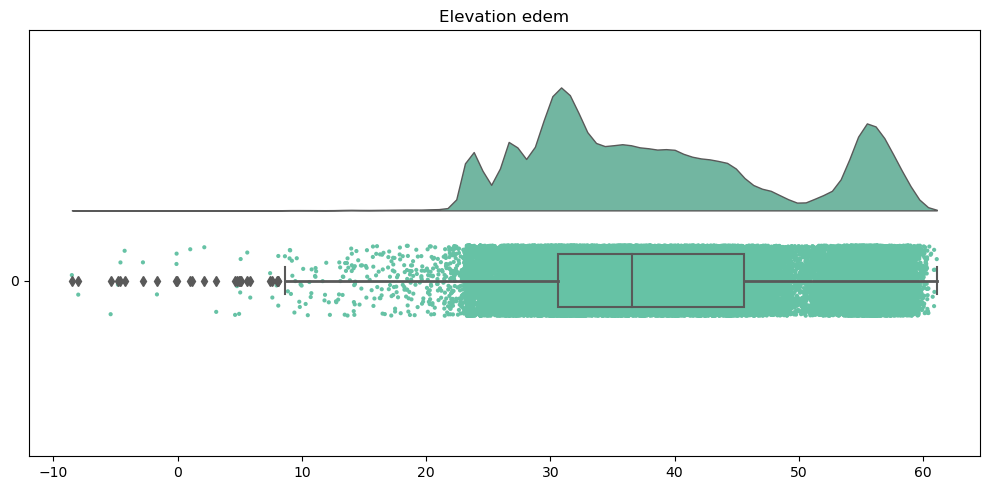

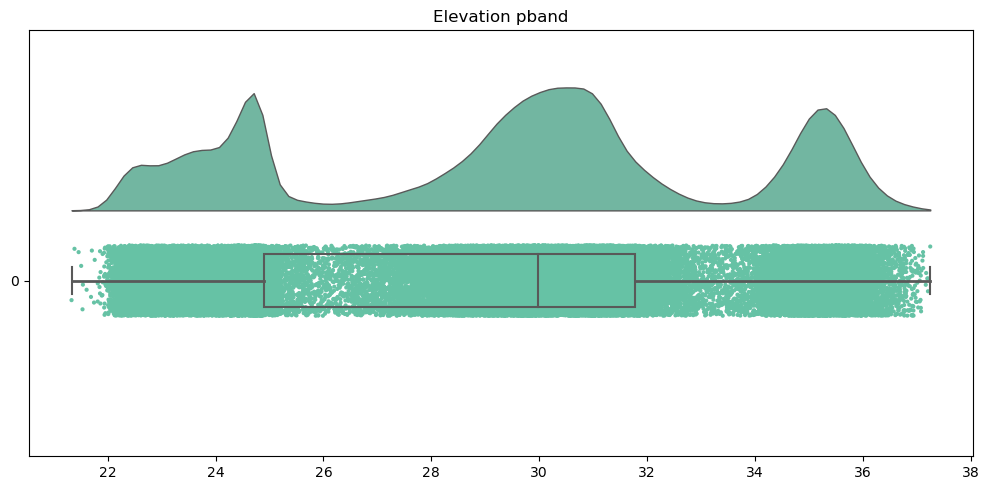

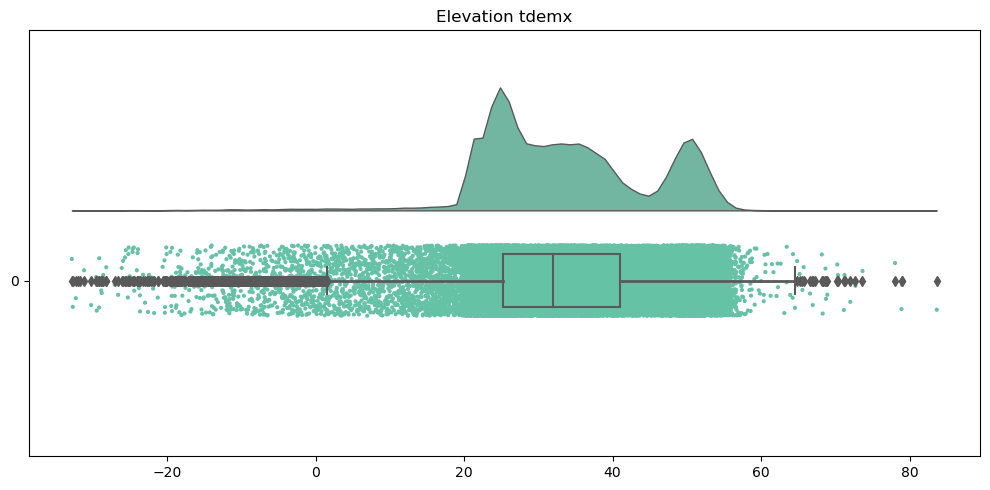

In [125]:
dc = df[COLS].copy()#df[ftcols_c]
for fcolc in COLS:uviz.plot_raincloud(dc[fcolc],fcolc,(10,5),None)

In [126]:
# tdemx is like edem, but differ from copdem, if t>c, then my t-dtm is better

In [127]:
x1 = 'edem'
x2 = 'tdemx'


In [128]:

def plot_sns_hist(df,x1,x2):
    x1_skew = df[x1].skew()
    x2_skew = df[x2].skew()


    fig, axs = plt.subplots(1,2, figsize=(12,4))
    sns.histplot(df[x1], kde=True, ax=axs[0], color='skyblue')
    axs[0].set_xlabel(x1.upper())
    axs[0].set_ylabel('Frequency')
    #np.min(df[x1]), np.max(df[x1])
    axs[0].text(0.5,0.8, f'Skew: {x1_skew:.2f}', transform=axs[0].transAxes, 
                horizontalalignment='right',color='black', weight='bold',
                fontsize=14)

    sns.histplot(df[x2], kde=True, ax=axs[1], color='skyblue')
    axs[1].set_xlabel(x2.upper())
    axs[1].set_ylabel('Frequency')
    axs[1].text(0.5,0.8, f'Skew: {x2_skew:.2f}', transform=axs[1].transAxes, 
                horizontalalignment='right',color='black', weight='bold',
                fontsize=14)

    plt.tight_layout()
    plt.subplots_adjust()

In [129]:
# can we actucally have negative values @ get rid of them and check raster and hist

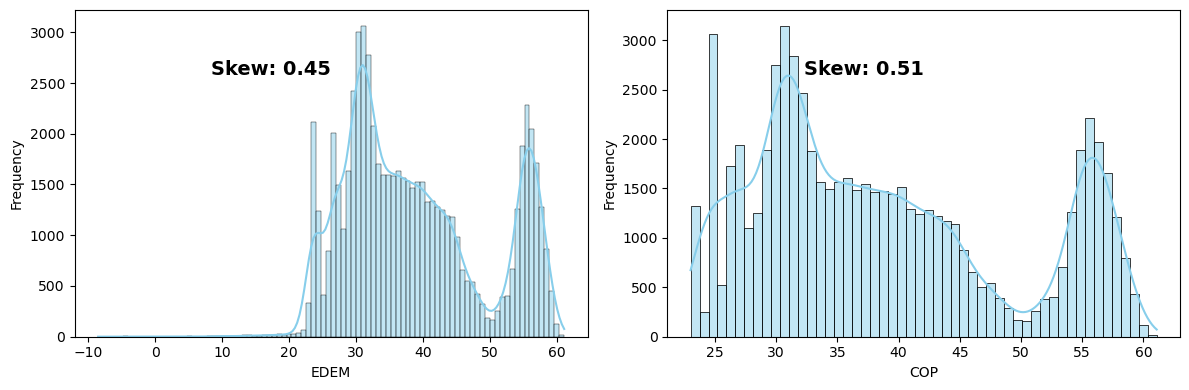

In [130]:
plot_sns_hist(df, 'edem','cop')

positive skew

positive skew, you can use five key transformations: Log, Square Root, Box-Cox, Yeo-Johnson, and Quantile Transformations. Each method aims to mitigate skewness, enhancing the data’s suitability for further analysis.

In [131]:
def apply_log_transform(df,col):
    df[f'log_{col}'] = np.log(df[col])
    return df

/home/joseph/miniconda3/envs/dev/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


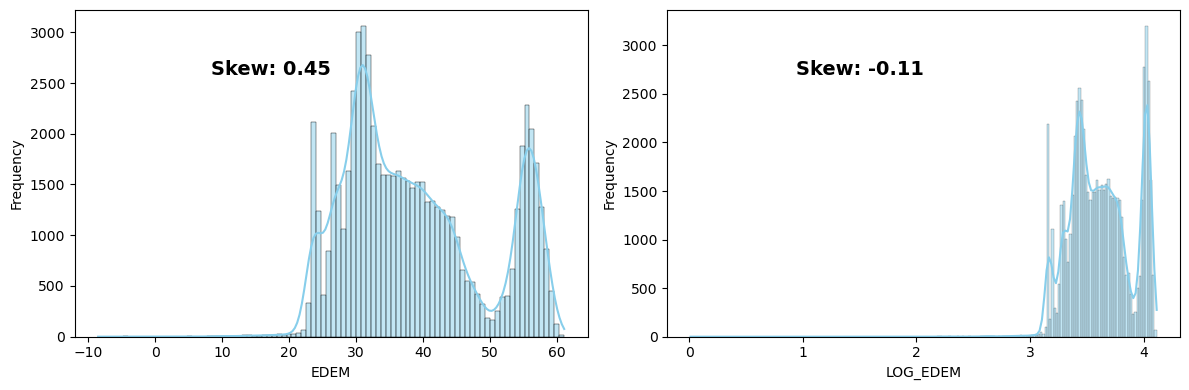

In [132]:
df = apply_log_transform(df, 'edem')
plot_sns_hist(df, 'edem','log_edem')

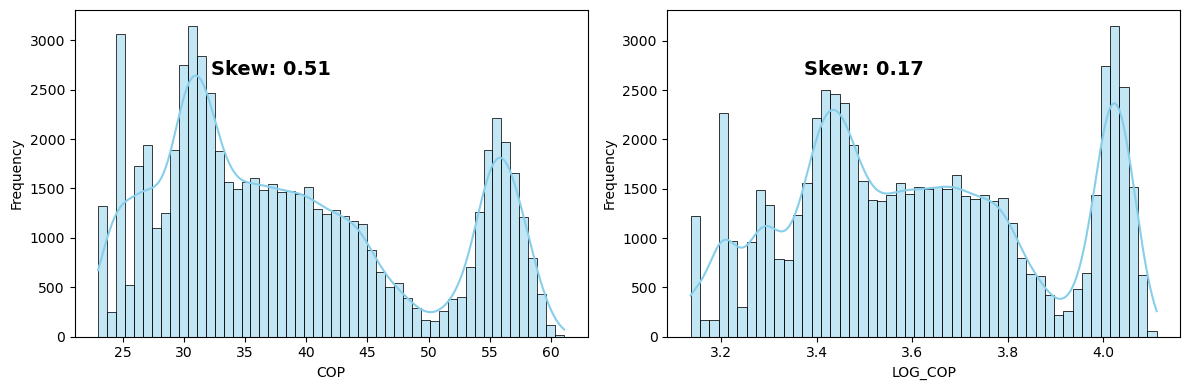

In [133]:
df = apply_log_transform(df, 'cop')
plot_sns_hist(df, 'cop','log_cop')

In [134]:
def plot_sns_hist_pannel(df, varnmes:list):
    fig, axs = plt.subplots(1, len(varnmes), 
                            figsize=(15,5))

    for i, variable in enumerate(varnmes):
        # Calculate skewness for each variable
        skewness = df[variable].skew()

        # Plot histogram for each variable
        sns.histplot(df[variable], kde=True, ax=axs[i], color='skyblue')
        axs[i].set_xlabel(variable.upper())
        axs[i].set_ylabel('Frequency')
        axs[i].text(0.5, 0.8, f'Skew: {skewness:.2f}', transform=axs[i].transAxes,
                    horizontalalignment='right', color='black', weight='bold',
                    fontsize=14)

    plt.tight_layout()
    plt.show()

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sns_hist_panel(df, varnames, plots_per_row = 3):
    num_variables = len(varnames)
    num_rows = -(-num_variables // plots_per_row)  # Calculate the number of rows needed

    fig, axs = plt.subplots(num_rows, plots_per_row, 
                            figsize=(4 * plots_per_row, 4 * num_rows), sharey=False)

    for i, variable in enumerate(varnames):
        row_num = i // plots_per_row
        col_num = i % plots_per_row

        # Calculate skewness for each variable
        skewness = df[variable].skew()

        # Plot histogram for each variable
        sns.histplot(df[variable], kde=True, ax=axs[row_num, col_num], color='skyblue')
        axs[row_num, col_num].set_xlabel(variable.upper())
        axs[row_num, col_num].set_ylabel('Frequency')
        axs[row_num, col_num].text(0.5, 0.8, f'Skew: {skewness:.2f}', transform=axs[row_num, col_num].transAxes,
                                   horizontalalignment='right', color='black', weight='bold',
                                   fontsize=14)

    # Remove empty subplots if needed
    for i in range(num_variables, num_rows * plots_per_row):
        fig.delaxes(axs.flatten()[i])

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_sns_hist_panel(your_dataframe, ['x1', 'x2', 'x3', 'x4', 'x5', 'x6'])


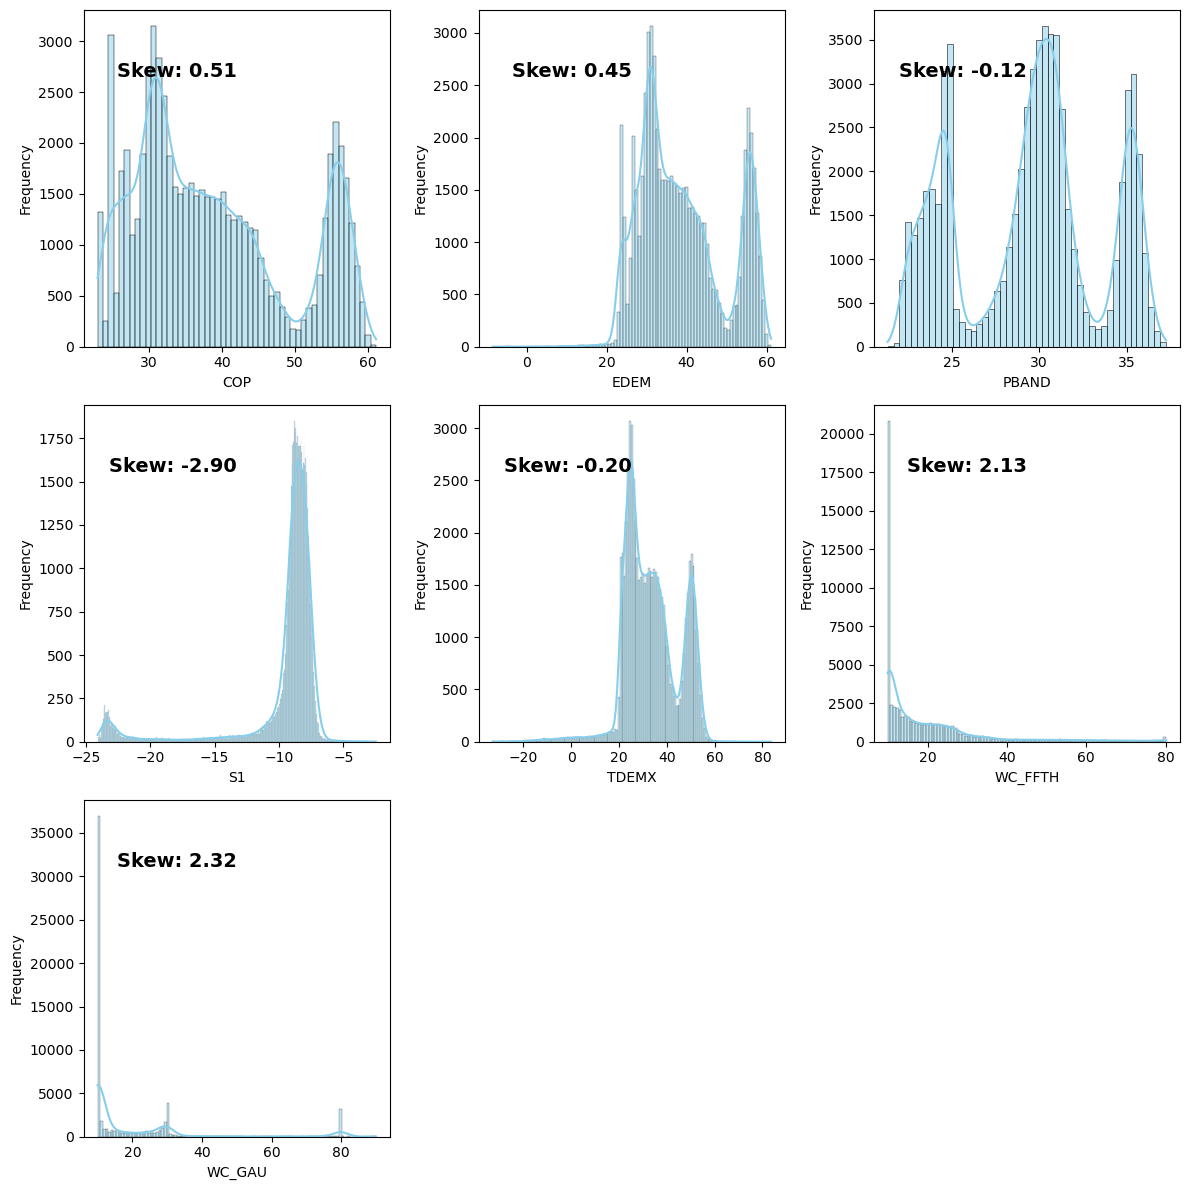

In [136]:
plot_sns_hist_panel(df, ftcols_c,3)

In [137]:
from pprint import pprint
from scipy.stats import kstest
def perform_kstest(df, xcols):
    kstest_out = {}
    for xcol in xcols:
        std_ds = (df[xcol] - df[xcol].mean()) / df[xcol].std()
        ks_stats, ks_pval = kstest(std_ds, 'norm')
        kstest_out[xcol] = (ks_stats, ks_pval)

    kstest_df = pd.DataFrame.from_dict(
        kstest_out, orient='index', columns=['ks_stats','pvalue']
    )
    pprint(kstest_df.round(7))
   # return kstest_df.round(7)

In [138]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox,yeojohnson
from sklearn.preprocessing import QuantileTransformer

def apply_skew_transformations(df, column_name):
    # Check skewness
    skewness = df[column_name].skew()

    # Apply transformations for positive skewness
    if skewness > 0:
        # Log transformation
        df[f'log_{column_name}'] = np.log1p(df[column_name])

        # Square root transformation
        positive_values_sqrt = np.maximum(0, df[column_name])  # Replace negative values with 0
        df[f'sqrt_{column_name}'] = np.sqrt(positive_values_sqrt)

        # Cube root transformation
        df[f'cbrt_{column_name}'] = np.cbrt(df[column_name])

        # Box-Cox transformation
        try:
            transformed_boxcox, _ = boxcox(df[column_name] + 1)  # Adding 1 to handle zero values
            df[f'boxcox_{column_name}'] = transformed_boxcox
        except ValueError:
            print(f"Unable to perform Box-Cox transformation for {column_name}. Contains non-positive values.")

        # Yeo-Johnson transformation
        try:
            transformed_yeojohnson, _ = yeojohnson(df[column_name])
            df[f'yeojohnson_{column_name}'] = transformed_yeojohnson
        except ValueError:
            print(f"Unable to perform Yeo-Johnson transformation for {column_name}. Contains non-positive values.")

    # Apply transformations for negative skewness
    elif skewness < 0:
        # Exponential transformation
        df[f'exp_{column_name}'] = np.exp(df[column_name])

        # Square transformation
        df[f'square_{column_name}'] = np.square(df[column_name])

        # Cube transformation
        df[f'cube_{column_name}'] = np.power(df[column_name], 3)


        # Box-Cox transformation
        try:
            transformed_boxcox, _ = boxcox(df[column_name] + 1)  # Adding 1 to handle zero values
            df[f'boxcox_{column_name}'] = transformed_boxcox
        except ValueError:
            print(f"Unable to perform Box-Cox transformation for {column_name}. Contains non-positive values.")

        # Yeo-Johnson transformation
        try:
            transformed_yeojohnson, _ = yeojohnson(df[column_name])
            df[f'yeojohnson_{column_name}'] = transformed_yeojohnson
        except ValueError:
            print(f"Unable to perform Yeo-Johnson transformation for {column_name}. Contains non-positive values.")


    # Quantile Transformation for both positive and negative skewness
    transformer = QuantileTransformer(output_distribution='normal')
     #transformer = QuantileTransformer(output_distribution='uniform')
    df[f'quantile_{column_name}'] = transformer.fit_transform(df[column_name].values.reshape(-1, 1))

    return df


/home/joseph/miniconda3/envs/dev/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Unable to perform Box-Cox transformation for edem. Contains non-positive values.


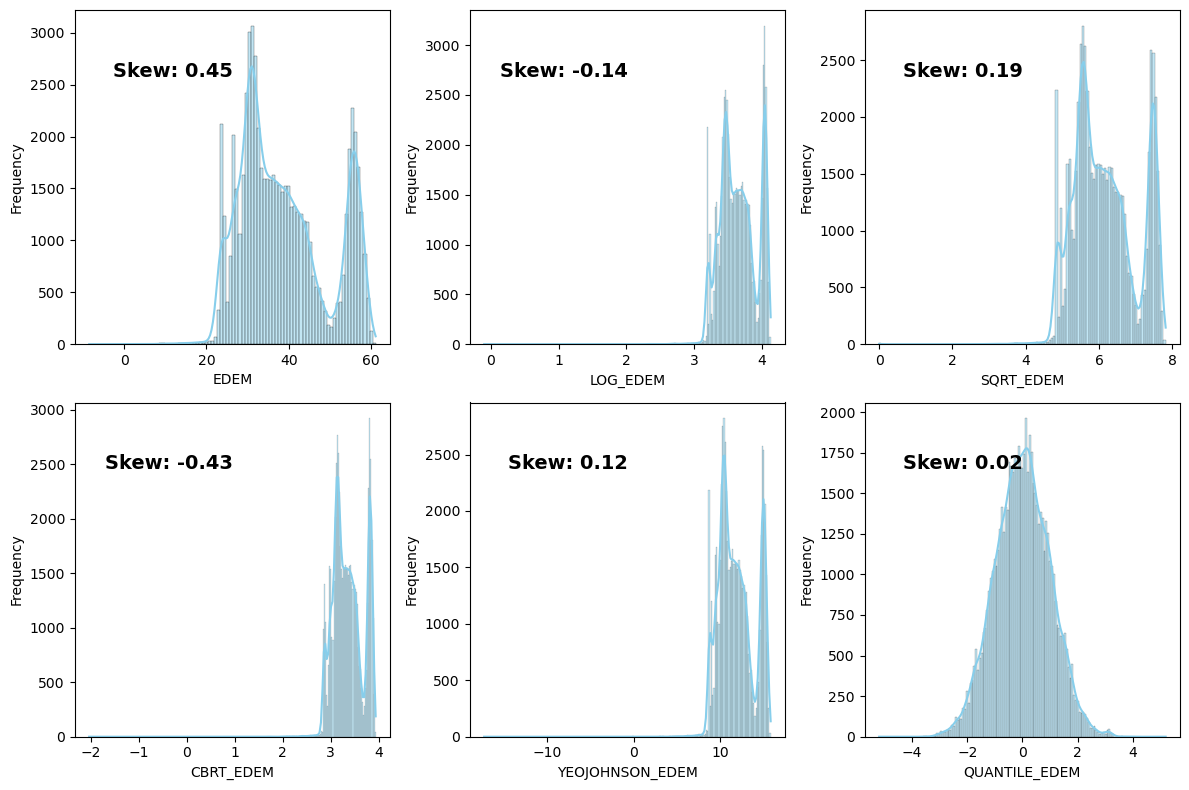

                 ks_stats    pvalue
edem             0.102180  0.000000
log_edem              NaN       NaN
sqrt_edem        0.097140  0.000000
cbrt_edem        0.092056  0.000000
yeojohnson_edem  0.097193  0.000000
quantile_edem    0.005010  0.074299


In [139]:
xcol = 'edem'
df = apply_skew_transformations(df,xcol)
xcols = [i for i in df.columns.tolist() if xcol in i]
plot_sns_hist_panel(df, xcols)
perform_kstest(df, xcols)

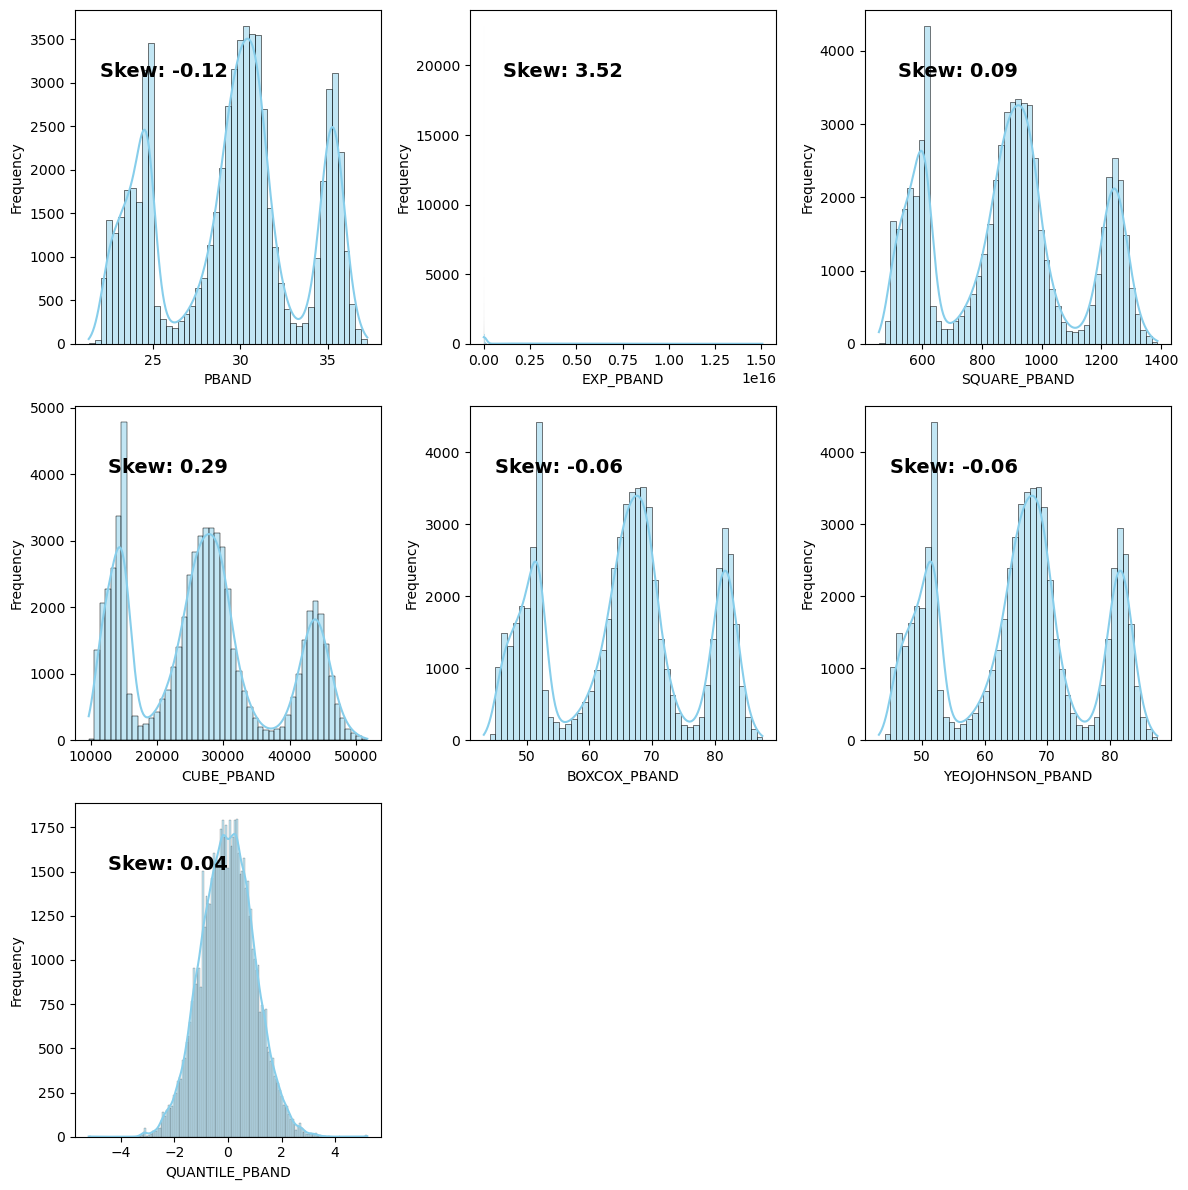

                  ks_stats   pvalue
pband             0.121087  0.00000
exp_pband         0.405459  0.00000
square_pband      0.118530  0.00000
cube_pband        0.113565  0.00000
boxcox_pband      0.120594  0.00000
yeojohnson_pband  0.120594  0.00000
quantile_pband    0.006218  0.01254


In [140]:
xcol = 'pband'
df = apply_skew_transformations(df,xcol)
xcols = [i for i in df.columns.tolist() if xcol in i]
plot_sns_hist_panel(df, xcols)
perform_kstest(df, xcols)

Unable to perform Box-Cox transformation for s1. Contains non-positive values.


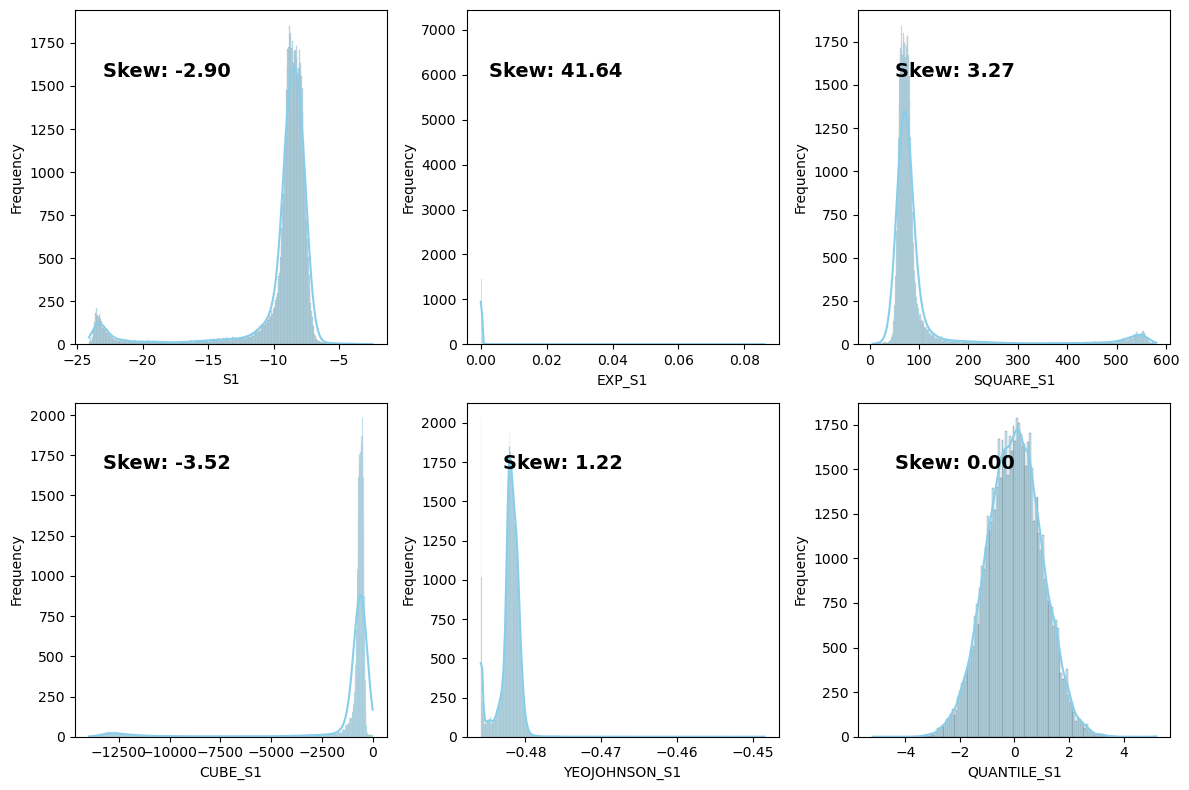

               ks_stats    pvalue
s1             0.323342  0.000000
exp_s1         0.406533  0.000000
square_s1      0.371853  0.000000
cube_s1        0.409463  0.000000
yeojohnson_s1  0.160290  0.000000
quantile_s1    0.006059  0.016206


In [141]:
xcol = 's1'
df = apply_skew_transformations(df,xcol)
xcols = [i for i in df.columns.tolist() if xcol in i]
plot_sns_hist_panel(df, xcols)
perform_kstest(df, xcols)

In [142]:
# how to inverse them once you make predictions?

In [143]:
xcols

['s1', 'exp_s1', 'square_s1', 'cube_s1', 'yeojohnson_s1', 'quantile_s1']

,ks_stats,pvalue
s1,0.323342,0.000000
exp_s1,0.406533,0.000000
square_s1,0.371853,0.000000
cube_s1,0.409463,0.000000
yeojohnson_s1,0.160290,0.000000
quantile_s1,0.004390,0.159433
